# PROJECT : -  Big Data Mart Sales Problem                                                                                                      

In [4]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [9]:
# Loading the dataset
Test_Data = pd.read_csv('D:bigdatamart_Test.csv')

In [10]:
Test_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
Test_Data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
# data types of attributes
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [13]:
# check unique values in dataset
Test_Data.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

Preprocessing the Dataset

In [14]:
# checking for null values
Test_Data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
# checking categorical attributes
cat_col = []
for x in Test_Data.dtypes.index:
    if Test_Data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [16]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [17]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(Test_Data[col].value_counts())
    print

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64
Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64
Outlet_Size
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64


In [20]:
# fill the missing values
item_weight_mean = Test_Data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [21]:
miss_bool = Test_Data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [23]:
for i, item in enumerate(Test_Data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            Test_Data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            Test_Data['Item_Weight'][i] = np.mean(Test_Data['Item_Weight'])

In [24]:
Test_Data['Item_Weight'].isnull().sum()

0

In [25]:
outlet_size_mode = Test_Data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [26]:
miss_bool = Test_Data['Outlet_Size'].isnull()
Test_Data.loc[miss_bool, 'Outlet_Size']= Test_Data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x]) 

In [27]:
Test_Data['Outlet_Size'].isnull().sum()

0

In [28]:
sum(Test_Data['Item_Visibility']==0)

353

In [29]:
Test_Data.loc[:, 'Item_Visibility'].replace([0],[Test_Data['Item_Visibility'].mean()], inplace=True)                                           

In [30]:
sum(Test_Data['Item_Visibility']==0)

0

In [31]:
# combine item fat content
Test_Data['Item_Fat_Content'] = Test_Data['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular','low fat': 'Low Fat'})
Test_Data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Creating New Attributes

In [32]:
Test_Data['Item_Type'] = Test_Data['Item_Identifier'].apply(lambda X: X[:2])
Test_Data['Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Type, Length: 5681, dtype: object

In [33]:
Test_Data['Item_Type'] = Test_Data['Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable','DR':'Drinks'})
Test_Data['Item_Type'].value_counts()                                                         

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type, dtype: int64

In [34]:
Test_Data.loc[Test_Data['Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
Test_Data['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [36]:
# create small values for year establishment year
Test_Data['Outlet_Years'] = 2013 - Test_Data['Outlet_Establishment_Year']

In [37]:
Test_Data['Outlet_Years']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 5681, dtype: int64

Exploratory Data Analysis

In [38]:
Test_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Food,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Food,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Non-Edible,0.099575,Non-Consumable,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Food,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Food,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

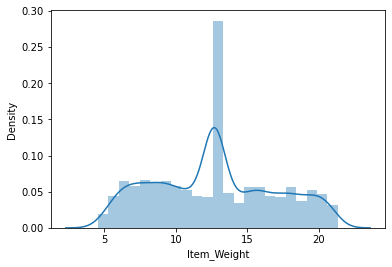

In [39]:
sns.distplot(Test_Data['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

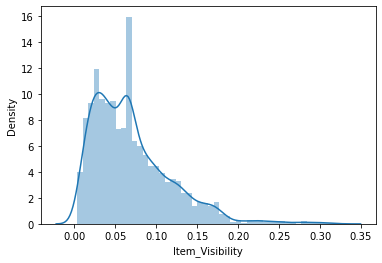

In [40]:
sns.distplot(Test_Data['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

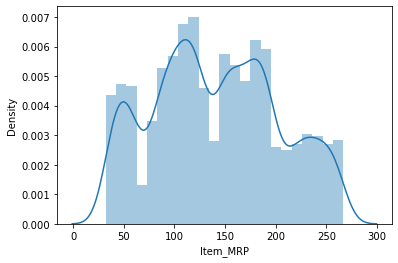

In [41]:
sns.distplot(Test_Data['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

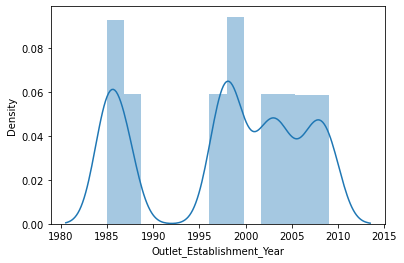

In [48]:
sns.distplot(Test_Data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

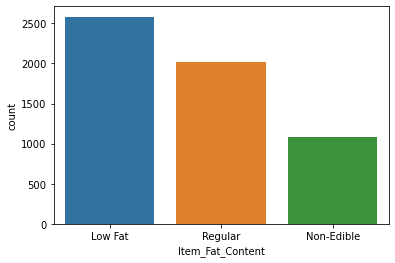

In [54]:
sns.countplot(Test_Data["Item_Fat_Content"])

[Text(0, 0, 'Food'), Text(1, 0, 'Non-Consumable'), Text(2, 0, 'Drinks')]

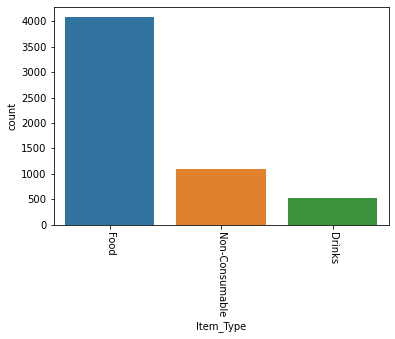

In [55]:
# plt.figure(figsize=(25,10))
l = list(Test_Data['Item_Type'].unique())
chart = sns.countplot(Test_Data["Item_Type"])
chart.set_xticklabels(labels=l, rotation=270)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

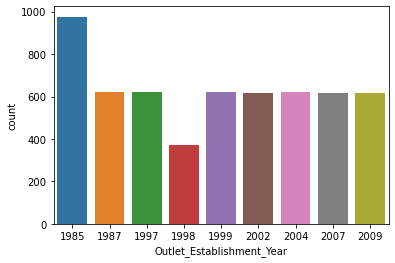

In [56]:
sns.countplot(Test_Data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

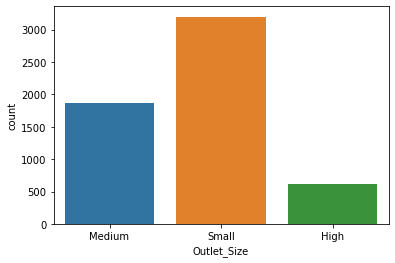

In [57]:
sns.countplot(Test_Data['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

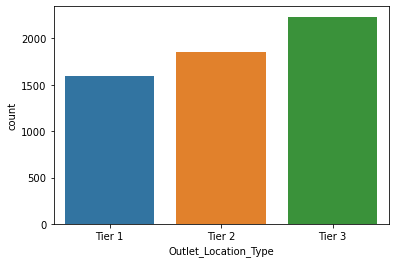

In [58]:
sns.countplot(Test_Data['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

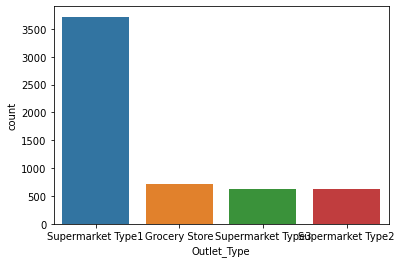

In [59]:
sns.countplot(Test_Data['Outlet_Type'])

COORELATION MATRIX

<AxesSubplot:>

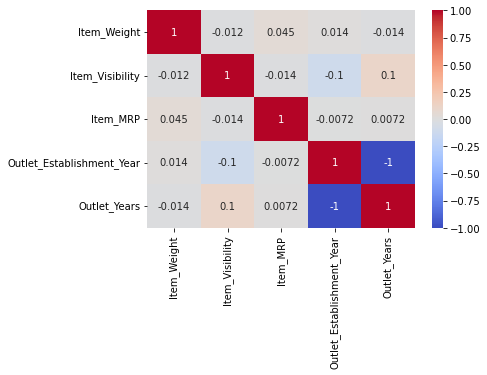

In [60]:
corr = Test_Data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

LABEL ENCODING

In [61]:
Test_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Food,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Food,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Non-Edible,0.099575,Non-Consumable,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Food,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Food,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Test_Data['Outlet'] = le.fit_transform(Test_Data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
for col in cat_col:
    Test_Data[col] = le.fit_transform(Test_Data[col])
    

ONEHOT ENCODING

In [64]:
Test_Data = pd.get_dummies(Test_Data, columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size'])
Test_Data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Outlet_Years,Outlet,Item_Fat_Content_0,...,Item_Fat_Content_2,Item_Type_0,Item_Type_1,Item_Type_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2
0,FDW58,20.750000,0.007565,107.8622,OUT049,1999,1,14,9,1,...,0,0,1,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,87.3198,OUT017,2007,1,6,2,0,...,1,0,1,0,0,1,0,0,0,1
2,NCN55,14.600000,0.099575,241.7538,OUT010,1998,0,15,0,0,...,0,0,0,1,0,0,1,0,0,1
3,FDQ58,7.315000,0.015388,155.0340,OUT017,2007,1,6,2,1,...,0,0,1,0,0,1,0,0,0,1
4,FDY38,12.695633,0.118599,234.2300,OUT027,1985,3,28,5,0,...,1,0,1,0,0,0,1,0,1,0


INPUT SPLIT

In [67]:
X = Test_Data.drop(columns=['Outlet_Establishment_Year','Outlet_Identifier','Outlet_Identifier','Item_Identifier'])
y = Test_Data['Outlet_Identifier']

MODEL TRAINING

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def Test(model, X, y):
    
    # train the model
    
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring= 'neg_mean_absolute_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
Test(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

ValueError: could not convert string to float: 'OUT049'

Model Report
MSE: 0.5729792249447712
CV Score: 0.5996711123073162


<AxesSubplot:title={'center':'Model Coefficients'}>

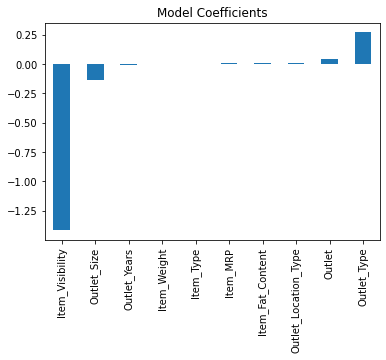

In [291]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.7628688679102086
CV Score: 0.6638429382952757


<AxesSubplot:title={'center':'Model Coefficients'}>

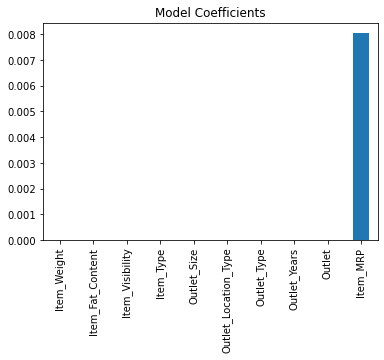

In [293]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [ ]:
# using the Advance model

Model Report
MSE: 8.330104595786819e-34
CV Score: 0.5890436242944584


<AxesSubplot:title={'center':'Feature Importance'}>

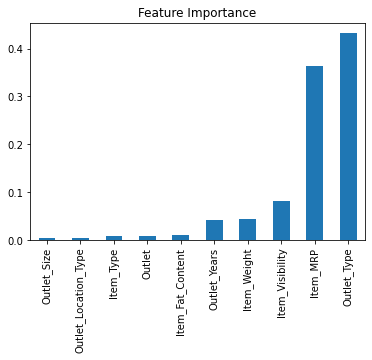

In [295]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
-----------Henace the Analysis hs been done  by using Machine learning models like
           LinaerRegression and DecisionTreeRegressor --------------